In [40]:
## bibliotecas necessarias
import librosa 
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Audio # play audio, funciona apenas no jupyter

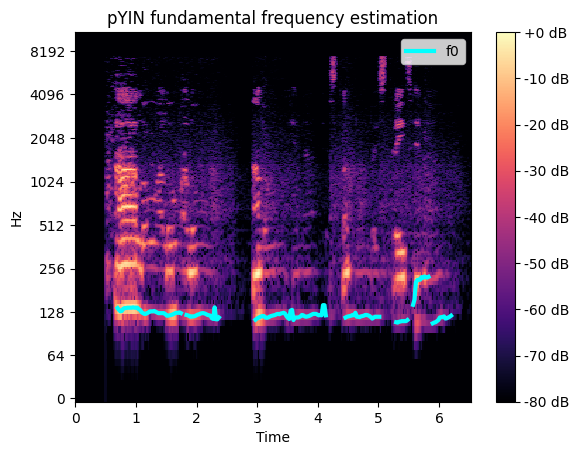

In [58]:
# lendo arquivo exemplo
filename = f'../media/voice_audio_10.wav'
sr = 22000
y, sr = librosa.load(filename, sr=sr)
Audio(data=y, rate=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), # calc f0
                                                    fmax=librosa.note_to_hz('C7'))

times = librosa.times_like(f0)

# plot do espectro ao longo do tempo e destaque na F0

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [59]:
# array para tirar uma media da freq. f0 do usuário
m0_arr = []

# lendo os arquivos em sequencia
for i in range(1,16):
    filename = f'../media/voice_audio_{i}.wav'
    sr = 22000 # taxa de amostragem para ler o audio
    y, sr = librosa.load(filename, sr=sr)

    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), # calc f0
                                                    fmax=librosa.note_to_hz('C7'))

    m0 = np.nanmean(f0) # calculando a f0 media para cada audio
    m0_arr.append(m0) # salvando no array


In [60]:
m0_arr = np.array(m0_arr) # transformando em numpy array

In [61]:
m0 = np.round(m0_arr.mean(), 2) # calculando media de f0 para todos os usuário (estimando oa f0 do usuário)
s0 = np.round(m0_arr.std(), 2) # calculando o desvio das amostras
print(m0, s0)

119.99 5.44


In [67]:
# Testando modelo proposto
for i in range(1,6):
    filename = f'../media/test_model_{i}.wav'
    sr = 22000
    y, sr = librosa.load(filename, sr=sr)
    Audio(data=y, rate=sr)

    f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                                fmin=librosa.note_to_hz('C2'),
                                                fmax=librosa.note_to_hz('C7'))
    m = np.nanmean(f0)
    if not np.isnan(m):
        print(filename, m)
        print("Usuario reconhecido:",((m0 - s0) <= m) and (m <= (m0 + s0)))


../media/test_model_1.wav 238.1793611358168
Usuario reconhecido: False
../media/test_model_2.wav 247.15940652875952
Usuario reconhecido: False
../media/test_model_3.wav 259.89854777351206
Usuario reconhecido: False
../media/test_model_4.wav 118.50621594213662
Usuario reconhecido: True


/tmp/ipykernel_3443/1339561183.py:11: RuntimeWarning: Mean of empty slice
  m = np.nanmean(f0)
